In [1]:
from google.colab import auth
auth.authenticate_user()

In [5]:
%%bigquery --project eneact-223811 df
SELECT * FROM `eneact-223811.canact2021.all`;

In [8]:
df.columns

Index(['local_id', 'activity_type_id', 'activity', 'activity_group',
       'created_at', 'started_at', 'finished_at', 'deleted_at', 'user_id',
       'user', 'user_tag', 'target_user_ids', 'customer_id', 'customer',
       'floor', 'record_type_id', 'name', 'value'],
      dtype='object')

In [31]:
date_df = df.sort_values('started_at')
print(date_df)

                                   local_id activity_type_id  ...      name value
47041  f9090c47-8875-4b7e-8325-7720e97efa6e                1  ...      None  None
59786  5c3d6a43-ccb0-4520-a7a6-7e89c9c0d067                1  ...      業務内容      
59787  5c3d6a43-ccb0-4520-a7a6-7e89c9c0d067                1  ...   業務の位置付け      
59788  5c3d6a43-ccb0-4520-a7a6-7e89c9c0d067                1  ...    業務の新規性      
59789  5c3d6a43-ccb0-4520-a7a6-7e89c9c0d067                1  ...  業務における立場      
...                                     ...              ...  ...       ...   ...
85993  f5360286-4f35-4f0c-8e66-ffd4ec266364                3  ...      None  None
86087  48aba255-bfe1-4a16-bd37-06c48bb32ad8                1  ...      None  None
86088  9d7b6cd1-9429-4970-aa6d-2f97f0abc205                1  ...      None  None
86126  86d1b87b-7f09-42c8-aee5-c582601528a3                6  ...      None  None
86181  d43b027b-e4b4-4b5a-9840-118aad6236bc                7  ...      None  None

[86273 rows x 1

In [32]:
print(date_df["name"].isnull().sum())
date_df["value"].isnull().sum()

4929


4929

In [33]:
# date_df.to_csv("/content/drive/MyDrive/Colab Notebooks/research/date_canact_0119.csv")

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/research/date_canact_0119.csv')

In [14]:
df = df[df['user'] != 'nishimura']


0        2020-11-21 08:32:13.351000+00:00
1        2020-11-21 08:32:14.329000+00:00
2        2020-11-21 08:32:14.329000+00:00
3        2020-11-21 08:32:14.329000+00:00
4        2020-11-21 08:32:14.329000+00:00
                       ...               
86266                                 NaN
86267                                 NaN
86268                                 NaN
86271                                 NaN
86272                                 NaN
Name: started_at, Length: 84985, dtype: object

In [40]:
import datetime
df['started_at'] = df['started_at'].astype('datetime64')
# a = pd.to_datetime(df['started_at'])
df['date'] = df['started_at'].dt.date
# date_sum = df['started_at'].resample('1D').sum()


In [52]:
df_count = df[df['started_at'] > '2021-01-05']
df_count = df_count.groupby('date').count()
df_count

,Unnamed: 0,local_id,activity_type_id,activity,activity_group,created_at,started_at,finished_at,deleted_at,user_id,user,user_tag,target_user_ids,customer_id,customer,floor,record_type_id,name,value
date,,,,,,,,,,,,,,,,,,,
2021-01-05,584,584,584,584,584,584,584,569,158,584,584,0,584,0,0,0,550,550,358
2021-01-06,2269,2269,2269,2269,2269,2269,2269,2261,685,2269,2269,0,2269,0,0,0,2145,2145,1325
2021-01-07,6585,6585,6585,6585,6585,6585,6585,6566,1121,6585,6585,0,6585,0,0,0,6281,6281,4481
2021-01-08,5039,5039,5039,5039,5039,5039,5039,5026,730,5039,5039,0,5039,0,0,0,4845,4845,3546
2021-01-09,974,974,974,974,974,974,974,974,322,974,974,0,974,0,0,0,927,927,521
2021-01-10,419,419,419,419,419,419,419,418,98,419,419,0,419,0,0,0,362,362,269
2021-01-11,3253,3253,3253,3253,3253,3253,3253,3242,676,3253,3253,0,3253,0,0,0,3102,3102,2285
2021-01-12,12765,12765,12765,12765,12765,12765,12765,12674,1464,12765,12765,0,12765,0,0,0,12294,12294,9918
2021-01-13,12304,12304,12304,12304,12304,12302,12304,12271,1221,12304,12304,0,12304,0,0,0,11876,11876,9613


# 収集されたデータ数

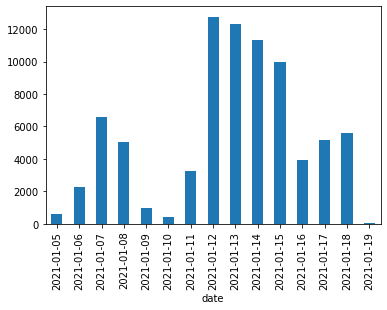

In [51]:
import matplotlib.pyplot as plt
df_count['activity_type_id'].plot.bar()

# アンケートの回答数

In [64]:
df = df[df['started_at'] > '2021-01-05']
ques_mor = df[df['activity'] == "朝のアンケート"]
ques_eve = df[df['activity'] == "昼のアンケート"]
ques_night_holi = df[df['activity'] == "夜のアンケート(休日)"]
ques_night = df[df['activity'] == "夜のアンケート(平日)"]

ques_mor_count = ques_mor.groupby('date').count()
ques_eve_count = ques_eve.groupby('date').count()
ques_night_holi_count =  ques_night_holi.groupby('date').count()
ques_night_count = ques_night.groupby('date').count()

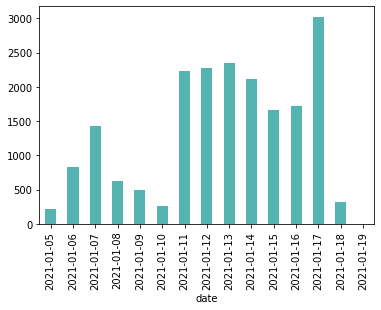

In [78]:
ques_mor_count['activity_type_id'].plot.bar(color='#55b3b1')

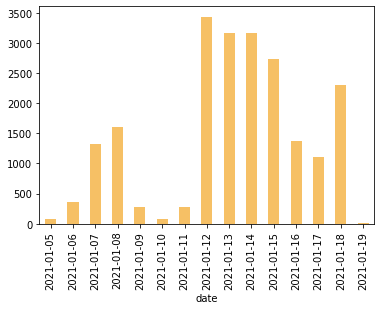

In [77]:
ques_eve_count['activity_type_id'].plot.bar(color='#f6c065')

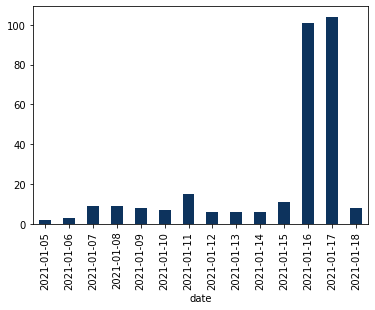

In [80]:
ques_night_holi_count['activity_type_id'].plot.bar(color='#0d335d')

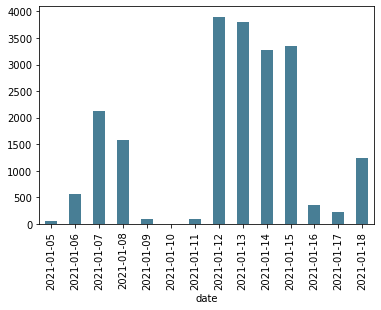

In [74]:
ques_night_count['activity_type_id'].plot.bar(color='#487e95')

# 個人ごとのデータ数

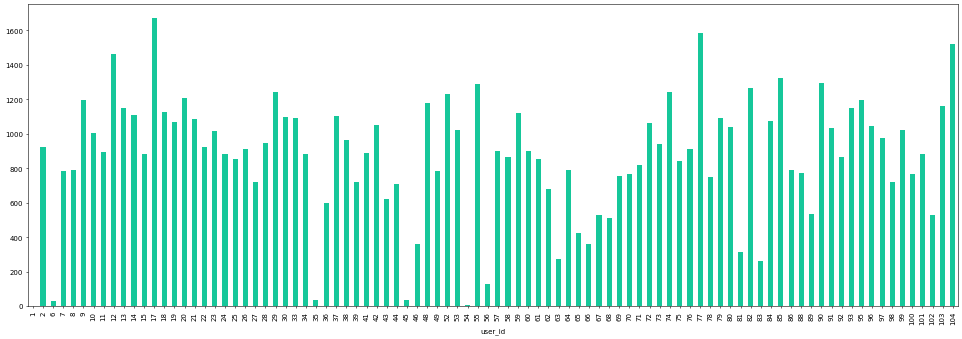

In [88]:
df_id = df.groupby('user_id').count()
plt.figure(figsize=(24, 8), dpi=50)
df_id['activity_type_id'].plot.bar(color='#16c79a')

In [89]:
df_id

,Unnamed: 0,local_id,activity_type_id,activity,activity_group,created_at,started_at,finished_at,deleted_at,user,user_tag,target_user_ids,customer_id,customer,floor,record_type_id,name,value,date
user_id,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,1
2,922,922,922,922,922,921,922,921,72,922,0,922,0,0,0,854,854,735,922
6,27,27,27,27,27,27,27,27,0,27,0,27,0,0,0,26,26,23,27
7,784,784,784,784,784,784,784,783,35,784,0,784,0,0,0,760,760,654,784
8,788,788,788,788,788,788,788,786,21,788,0,788,0,0,0,757,757,668,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,769,769,769,769,769,769,769,769,113,769,0,769,0,0,0,764,764,578,769
101,881,881,881,881,881,881,881,881,0,881,0,881,0,0,0,844,844,730,881
102,527,527,527,527,527,527,527,526,75,527,0,527,0,0,0,519,519,396,527


In [90]:
!echo "# research_mental_prediction" >> README.md

In [91]:
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/yusukennn/research_mental_prediction.git


Initialized empty Git repository in /content/.git/

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ca40aa1d1c62.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/yusukennn/research_mental_prediction.git'


In [93]:
!git add *
!git commit -m "first commit"
!git push -u origin master

error: open("drive/MyDrive/22卒身上書＿人間_LeNhatTan.gsheet"): Operation not supported
error: unable to index file drive/MyDrive/22卒身上書＿人間_LeNhatTan.gsheet
fatal: adding files failed

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ca40aa1d1c62.(none)')
error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/yusukennn/research_mental_prediction.git'


In [97]:

!cd drive 

drive  README.md  sample_data


drive  README.md  sample_data
